In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# For Filtering the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('kidney_disease.csv')
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [4]:
data.classification.unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [5]:
data.classification.unique()

array(['ckd', 'notckd'], dtype=object)

In [6]:
data.drop('id', axis = 1, inplace = True)
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [7]:
data['classification'] = data['classification'].replace(['ckd','notckd'], [1,0])
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,1
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,1
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,1
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,1
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,1


age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [9]:
df = data.dropna(axis = 0)
print(f"Before dropping all NaN values: {data.shape}")
print(f"After dropping all NaN values: {df.shape}")
df.head()

Before dropping all NaN values: (400, 25)
After dropping all NaN values: (158, 25)


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,1
9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,29,12100,3.7,yes,yes,no,poor,no,yes,1
11,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,380.0,...,32,4500,3.8,yes,yes,no,poor,yes,no,1
14,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,157.0,...,16,11000,2.6,yes,yes,yes,poor,yes,no,1
20,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,173.0,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,1


In [10]:
df.index = range(0,len(df),1)
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,1
1,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,29,12100,3.7,yes,yes,no,poor,no,yes,1
2,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,380.0,...,32,4500,3.8,yes,yes,no,poor,yes,no,1
3,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,157.0,...,16,11000,2.6,yes,yes,yes,poor,yes,no,1
4,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,173.0,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,1


In [11]:
for i in df['wc']:
    print(i)

6700
12100
4500
11000
9200
6900
9600
18900
7200
14600
6400
	6200
3800
9800
12500
5600
7000
15200
5000
16300
	8400
10500
15200
14600
7900
10900
12800
12400
19100
7500
16700
9600
26400
9800
8800
7400
12000
7500
15700
11500
5000
10200
5400
10400
9800
9100
6200
8300
9200
10700
9100
8400
4300
9400
5600
7200
8600
5000
10500
6800
9500
6900
7200
9000
5600
4700
6300
9400
5800
9100
5500
6700
5300
9800
7100
7000
10200
6300
8600
11000
7200
6200
9100
4300
7900
6900
11000
7500
8200
9400
8100
7000
10400
9600
7800
6700
8300
10700
7800
6700
4300
10700
7500
4700
7000
6700
7300
7700
5500
8100
7900
7200
7300
9900
7000
5800
6800
6300
7400
11000
5200
6000
5800
5400
10300
9300
10500
6700
9400
10300
9300
6500
10500
9200
8000
9700
9100
6400
5400
6500
6000
5100
11000
8000
5700
6200
9500
7200
6300
5800
6600
7400
9500
6700
7800
6600
7200
6800


In [12]:
df['wc']=df['wc'].replace(["\t6200","\t8400"],[6200,8400])
for i in df['wc']:
    print(i)

6700
12100
4500
11000
9200
6900
9600
18900
7200
14600
6400
6200
3800
9800
12500
5600
7000
15200
5000
16300
8400
10500
15200
14600
7900
10900
12800
12400
19100
7500
16700
9600
26400
9800
8800
7400
12000
7500
15700
11500
5000
10200
5400
10400
9800
9100
6200
8300
9200
10700
9100
8400
4300
9400
5600
7200
8600
5000
10500
6800
9500
6900
7200
9000
5600
4700
6300
9400
5800
9100
5500
6700
5300
9800
7100
7000
10200
6300
8600
11000
7200
6200
9100
4300
7900
6900
11000
7500
8200
9400
8100
7000
10400
9600
7800
6700
8300
10700
7800
6700
4300
10700
7500
4700
7000
6700
7300
7700
5500
8100
7900
7200
7300
9900
7000
5800
6800
6300
7400
11000
5200
6000
5800
5400
10300
9300
10500
6700
9400
10300
9300
6500
10500
9200
8000
9700
9100
6400
5400
6500
6000
5100
11000
8000
5700
6200
9500
7200
6300
5800
6600
7400
9500
6700
7800
6600
7200
6800


In [13]:
df.info()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             158 non-null    float64
 1   bp              158 non-null    float64
 2   sg              158 non-null    float64
 3   al              158 non-null    float64
 4   su              158 non-null    float64
 5   rbc             158 non-null    object 
 6   pc              158 non-null    object 
 7   pcc             158 non-null    object 
 8   ba              158 non-null    object 
 9   bgr             158 non-null    float64
 10  bu              158 non-null    float64
 11  sc              158 non-null    float64
 12  sod             158 non-null    float64
 13  pot             158 non-null    float64
 14  hemo            158 non-null    float64
 15  pcv             158 non-null    object 
 16  wc              158 non-null    object 
 17  rc              158 non-null    obj

In [14]:
object_dtypes = df.select_dtypes(include = 'object')
object_dtypes.head()

,rbc,pc,pcc,ba,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,normal,abnormal,present,notpresent,32,6700,3.9,yes,no,no,poor,yes,yes
1,abnormal,abnormal,present,notpresent,29,12100,3.7,yes,yes,no,poor,no,yes
2,abnormal,abnormal,present,notpresent,32,4500,3.8,yes,yes,no,poor,yes,no
3,normal,abnormal,present,present,16,11000,2.6,yes,yes,yes,poor,yes,no
4,abnormal,abnormal,notpresent,notpresent,24,9200,3.2,yes,yes,yes,poor,yes,yes


In [15]:
dictonary = {
        "rbc": {
        "abnormal":1,
        "normal": 0,
    },
        "pc":{
        "abnormal":1,
        "normal": 0,
    },
        "pcc":{
        "present":1,
        "notpresent":0,
    },
        "ba":{
        "notpresent":0,
        "present": 1,
    },
        "htn":{
        "yes":1,
        "no": 0,
    },
        "dm":{
        "yes":1,
        "no":0,
    },
        "cad":{
        "yes":1,
        "no": 0,
    },
        "appet":{
        "good":1,
        "poor": 0,
    },
        "pe":{
        "yes":1,
        "no":0,
    },
        "ane":{
        "yes":1,
        "no":0,
    }
}
df=df.replace(dictonary)
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,70.0,1.005,4.0,0.0,0,1,1,0,117.0,...,32,6700,3.9,1,0,0,0,1,1,1
1,53.0,90.0,1.020,2.0,0.0,1,1,1,0,70.0,...,29,12100,3.7,1,1,0,0,0,1,1
2,63.0,70.0,1.010,3.0,0.0,1,1,1,0,380.0,...,32,4500,3.8,1,1,0,0,1,0,1
3,68.0,80.0,1.010,3.0,2.0,0,1,1,1,157.0,...,16,11000,2.6,1,1,1,0,1,0,1
4,61.0,80.0,1.015,2.0,0.0,1,1,0,0,173.0,...,24,9200,3.2,1,1,1,0,1,1,1


<Axes: >

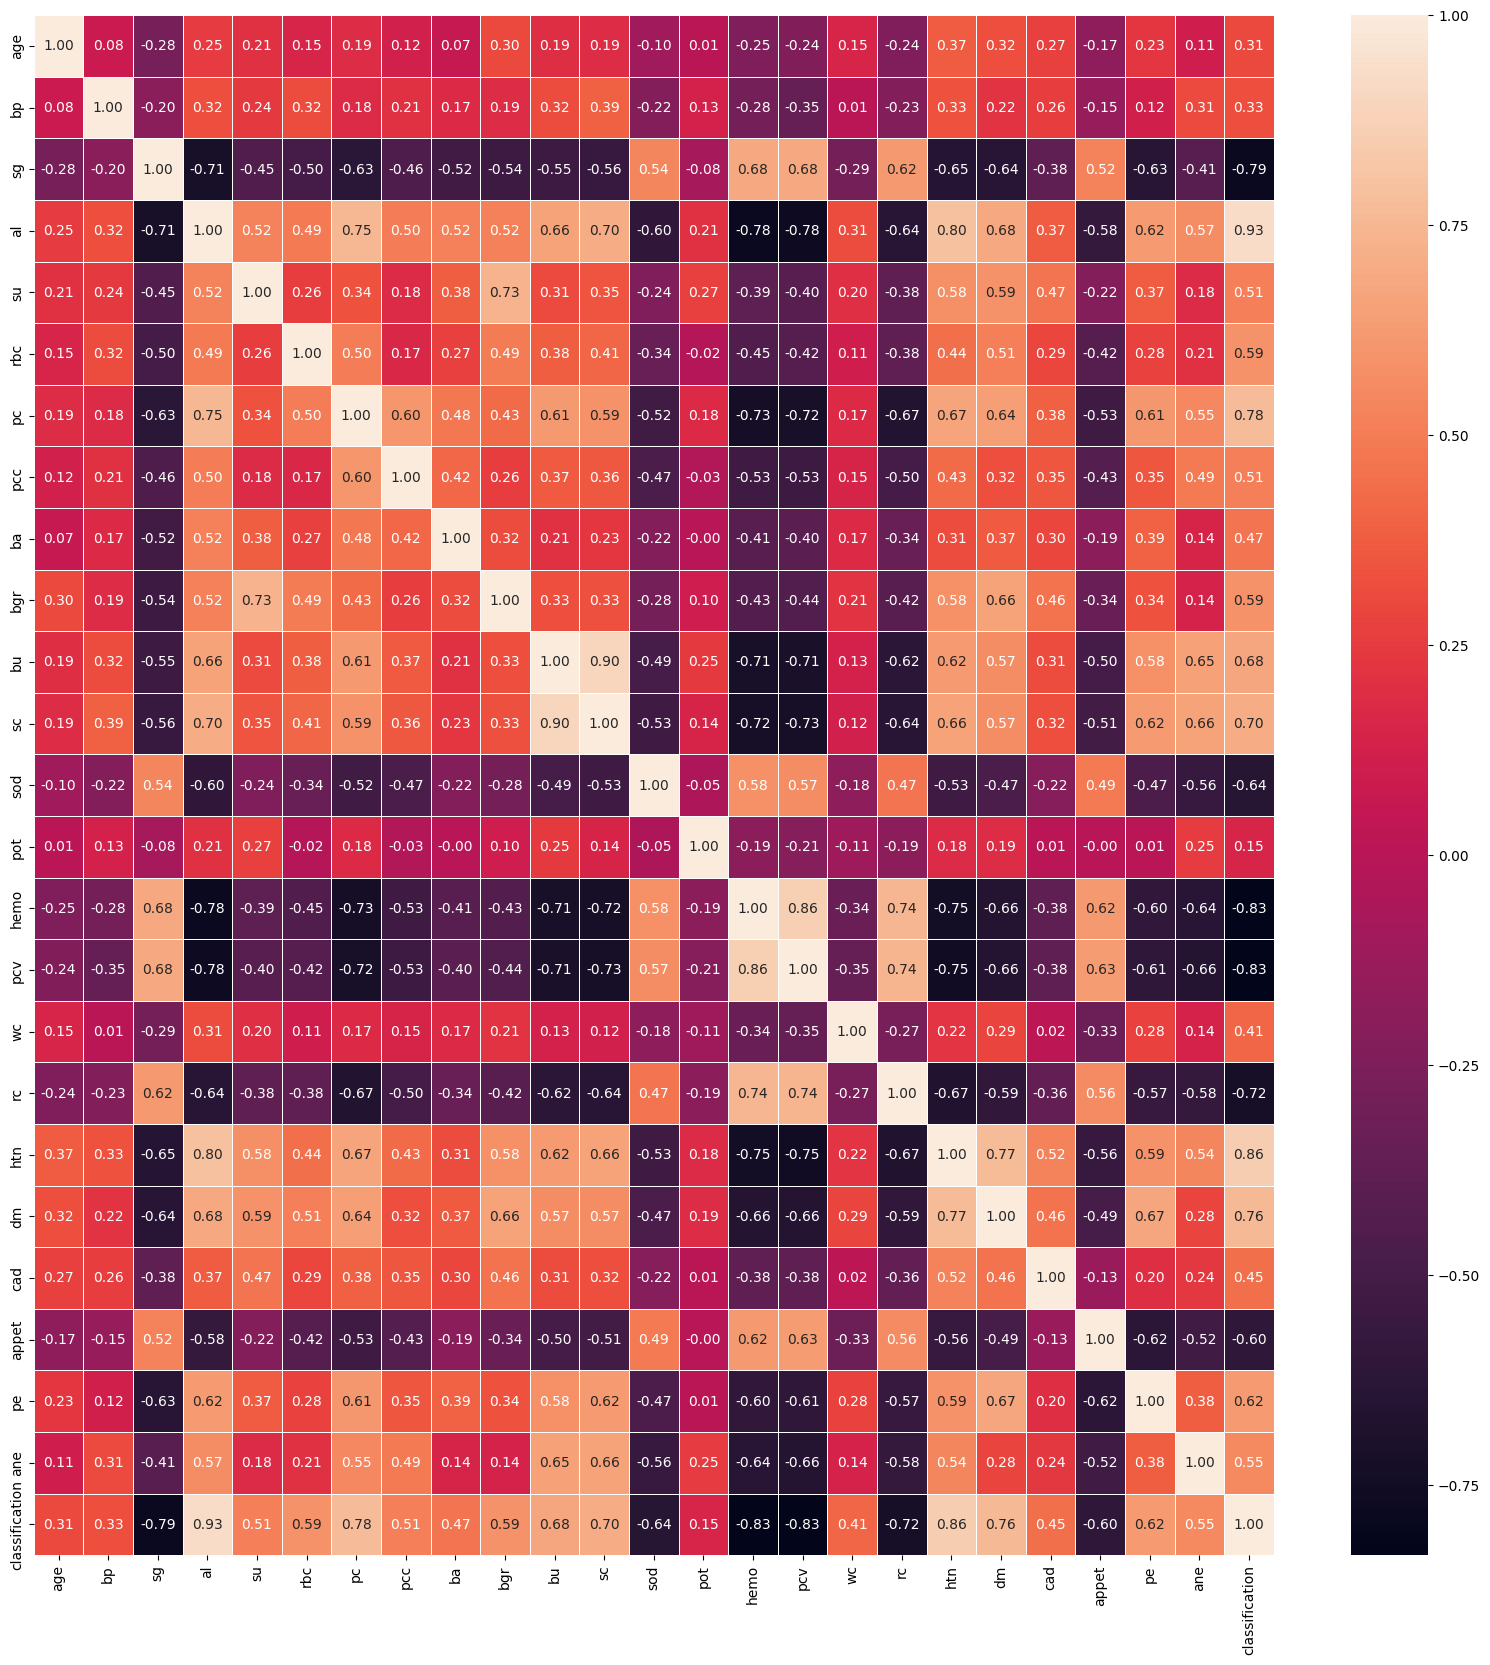

In [16]:
import seaborn as sns
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot = True, fmt=".2f",linewidths=0.5)

In [17]:
df.corr()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
age,1.000000,0.079712,-0.277303,0.253380,0.207711,0.147971,0.188907,0.124032,0.068353,0.301915,...,-0.235116,0.153132,-0.242235,0.372348,0.323957,0.269868,-0.170259,0.232327,0.105809,0.305119
bp,0.079712,1.000000,-0.198897,0.322507,0.243828,0.316670,0.179834,0.206507,0.174555,0.190113,...,-0.353504,0.008274,-0.228533,0.334951,0.218096,0.257709,-0.145047,0.117878,0.311097,0.326567
sg,-0.277303,-0.198897,1.000000,-0.712331,-0.448477,-0.500494,-0.630323,-0.460050,-0.516392,-0.544781,...,0.678472,-0.288930,0.619092,-0.648168,-0.639391,-0.379305,0.523944,-0.633622,-0.413252,-0.790102
al,0.253380,0.322507,-0.712331,1.000000,0.521448,0.489941,0.752956,0.503341,0.516104,0.518123,...,-0.775528,0.314574,-0.640099,0.796876,0.678582,0.374755,-0.578080,0.622268,0.569529,0.925816
su,0.207711,0.243828,-0.448477,0.521448,1.000000,0.256568,0.335901,0.177327,0.381929,0.730050,...,-0.404821,0.201000,-0.377726,0.577286,0.591010,0.466658,-0.220547,0.374128,0.179811,0.510615
rbc,0.147971,0.316670,-0.500494,0.489941,0.256568,1.000000,0.498959,0.168592,0.273177,0.493857,...,-0.422537,0.108857,-0.379378,0.442400,0.511777,0.293269,-0.418639,0.282868,0.209797,0.586391
pc,0.188907,0.179834,-0.630323,0.752956,0.335901,0.498959,1.000000,0.600092,0.481227,0.430646,...,-0.718042,0.169936,-0.667113,0.666767,0.636288,0.384223,-0.528435,0.606234,0.545380,0.775388
pcc,0.124032,0.206507,-0.460050,0.503341,0.177327,0.168592,0.600092,1.000000,0.415033,0.257768,...,-0.534564,0.146742,-0.499401,0.432876,0.321900,0.352255,-0.432515,0.350171,0.485941,0.509915
ba,0.068353,0.174555,-0.516392,0.516104,0.381929,0.273177,0.481227,0.415033,1.000000,0.318095,...,-0.397500,0.170071,-0.343299,0.314961,0.367477,0.297063,-0.187815,0.393819,0.141344,0.468845
bgr,0.301915,0.190113,-0.544781,0.518123,0.730050,0.493857,0.430646,0.257768,0.318095,1.000000,...,-0.443818,0.212093,-0.418085,0.579407,0.663012,0.459164,-0.338924,0.336141,0.139854,0.591217


In [18]:
X = df.drop(['classification', 'sg', 'appet', 'rc', 'pcv', 'hemo', 'sod'], axis = 1)
y = df['classification']
X.columns

Index(['age', 'bp', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc',
       'pot', 'wc', 'htn', 'dm', 'cad', 'pe', 'ane'],
      dtype='object')

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 20)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test, model.predict(X_test))
print(f"Accuracy is {round(accuracy_score(y_test, model.predict(X_test))*100, 2)}%")

Accuracy is 100.0%


In [21]:
import pickle
pickle.dump(model, open('kidney.pkl', 'wb'))

In [22]:
kidney=pd.read_csv('kidney_disease.csv')
kidney.shape
kidney.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [23]:
kidney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [24]:
kidney.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [25]:
kidney.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [26]:
kidney.describe().T

,count,mean,std,min,25%,50%,75%,max
id,400.0,199.500000,115.614301,0.000,99.75,199.50,299.25,399.000
age,391.0,51.483376,17.169714,2.000,42.00,55.00,64.50,90.000
bp,388.0,76.469072,13.683637,50.000,70.00,80.00,80.00,180.000
sg,353.0,1.017408,0.005717,1.005,1.01,1.02,1.02,1.025
al,354.0,1.016949,1.352679,0.000,0.00,0.00,2.00,5.000
su,351.0,0.450142,1.099191,0.000,0.00,0.00,0.00,5.000
bgr,356.0,148.036517,79.281714,22.000,99.00,121.00,163.00,490.000
bu,381.0,57.425722,50.503006,1.500,27.00,42.00,66.00,391.000
sc,383.0,3.072454,5.741126,0.400,0.90,1.30,2.80,76.000
sod,313.0,137.528754,10.408752,4.500,135.00,138.00,142.00,163.000


In [27]:
def convert_dtype(kidney,feature):
    kidney[feature]=pd.to_numeric(kidney[feature],errors='coerce')

In [30]:
import pandas as pd

def convert_dtype(kidney, feature):
    """
    Convert the dtype of a specific feature in the DataFrame to numeric.

    Args:
    kidney (pd.DataFrame): The DataFrame containing the data.
    feature (str): The name of the column to convert.
    """
    # Strip leading/trailing spaces and convert to lowercase for case-insensitive matching
    feature = feature.strip().lower()

    # Check if the feature (after cleaning) exists in the DataFrame's columns
    if feature in kidney.columns.str.strip().str.lower().tolist():
        # Use the original case of the column name for data manipulation
        actual_feature_name = kidney.columns[kidney.columns.str.strip().str.lower() == feature][0]
        kidney[actual_feature_name] = pd.to_numeric(kidney[actual_feature_name], errors='coerce')
    else:
        print(f"Warning: Feature '{feature}' not found in the DataFrame.")

# Example usage
features = ['packed cell volume', 'white blood cell count', 'red blood cell count']
for feature in features:
    convert_dtype(kidney, feature)
kidney.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [31]:
kidney.drop('id',inplace=True,axis=1)

In [32]:
def extract_cat_num(kidney):
    cat_col=[col for col in kidney.columns if kidney[col].dtype=='O']
    num_col=[col for col in kidney.columns if kidney[col].dtype!='O']
    return cat_col,num_col

In [33]:
cat_col,num_col=extract_cat_num(kidney)
cat_col

['rbc',
 'pc',
 'pcc',
 'ba',
 'pcv',
 'wc',
 'rc',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

In [35]:
import pandas as pd

def extract_cat_num(kidney):
    cat_col=[col for col in kidney.columns if kidney[col].dtype=='O']
    num_col=[col for col in kidney.columns if kidney[col].dtype!='O']
    return cat_col,num_col

# Assuming your data is in a CSV file named 'kidney_disease.csv'
# Replace 'kidney_disease.csv' with the actual file path if it's different
kidney = pd.read_csv('kidney_disease.csv') # This line loads the data into the 'kidney' DataFrame

# Call the function and assign the results to variables in the global scope
cat_col, num_col = extract_cat_num(kidney) 

# Now you can use cat_col and num_col in the next cell
cat_col 
num_col

['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']

In [36]:
for col in cat_col:
    print('{} has {} values'.format(col,kidney[col].unique()))
    print("\n")

rbc has [nan 'normal' 'abnormal'] values


pc has ['normal' 'abnormal' nan] values


pcc has ['notpresent' 'present' nan] values


ba has ['notpresent' 'present' nan] values


pcv has ['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '\t?' '52' '14' '22' '18' '42' '17' '46' '23'
 '19' '25' '41' '26' '15' '21' '43' '20' '\t43' '47' '9' '49' '50' '53'
 '51' '54'] values


wc has ['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '6300' '\t6200' '7100' '11800' '9400' '5500' '5800'
 '13200' '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800'
 '6500' '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300'
 '12400' '\t8400' '10500' '4200' '4700' '10900' '8100' '9500' '2200'
 '12800' '11200' '19100' '\t?' '12300' '16700' '2600' '26400' '8800'

In [37]:
len(num_col)

12

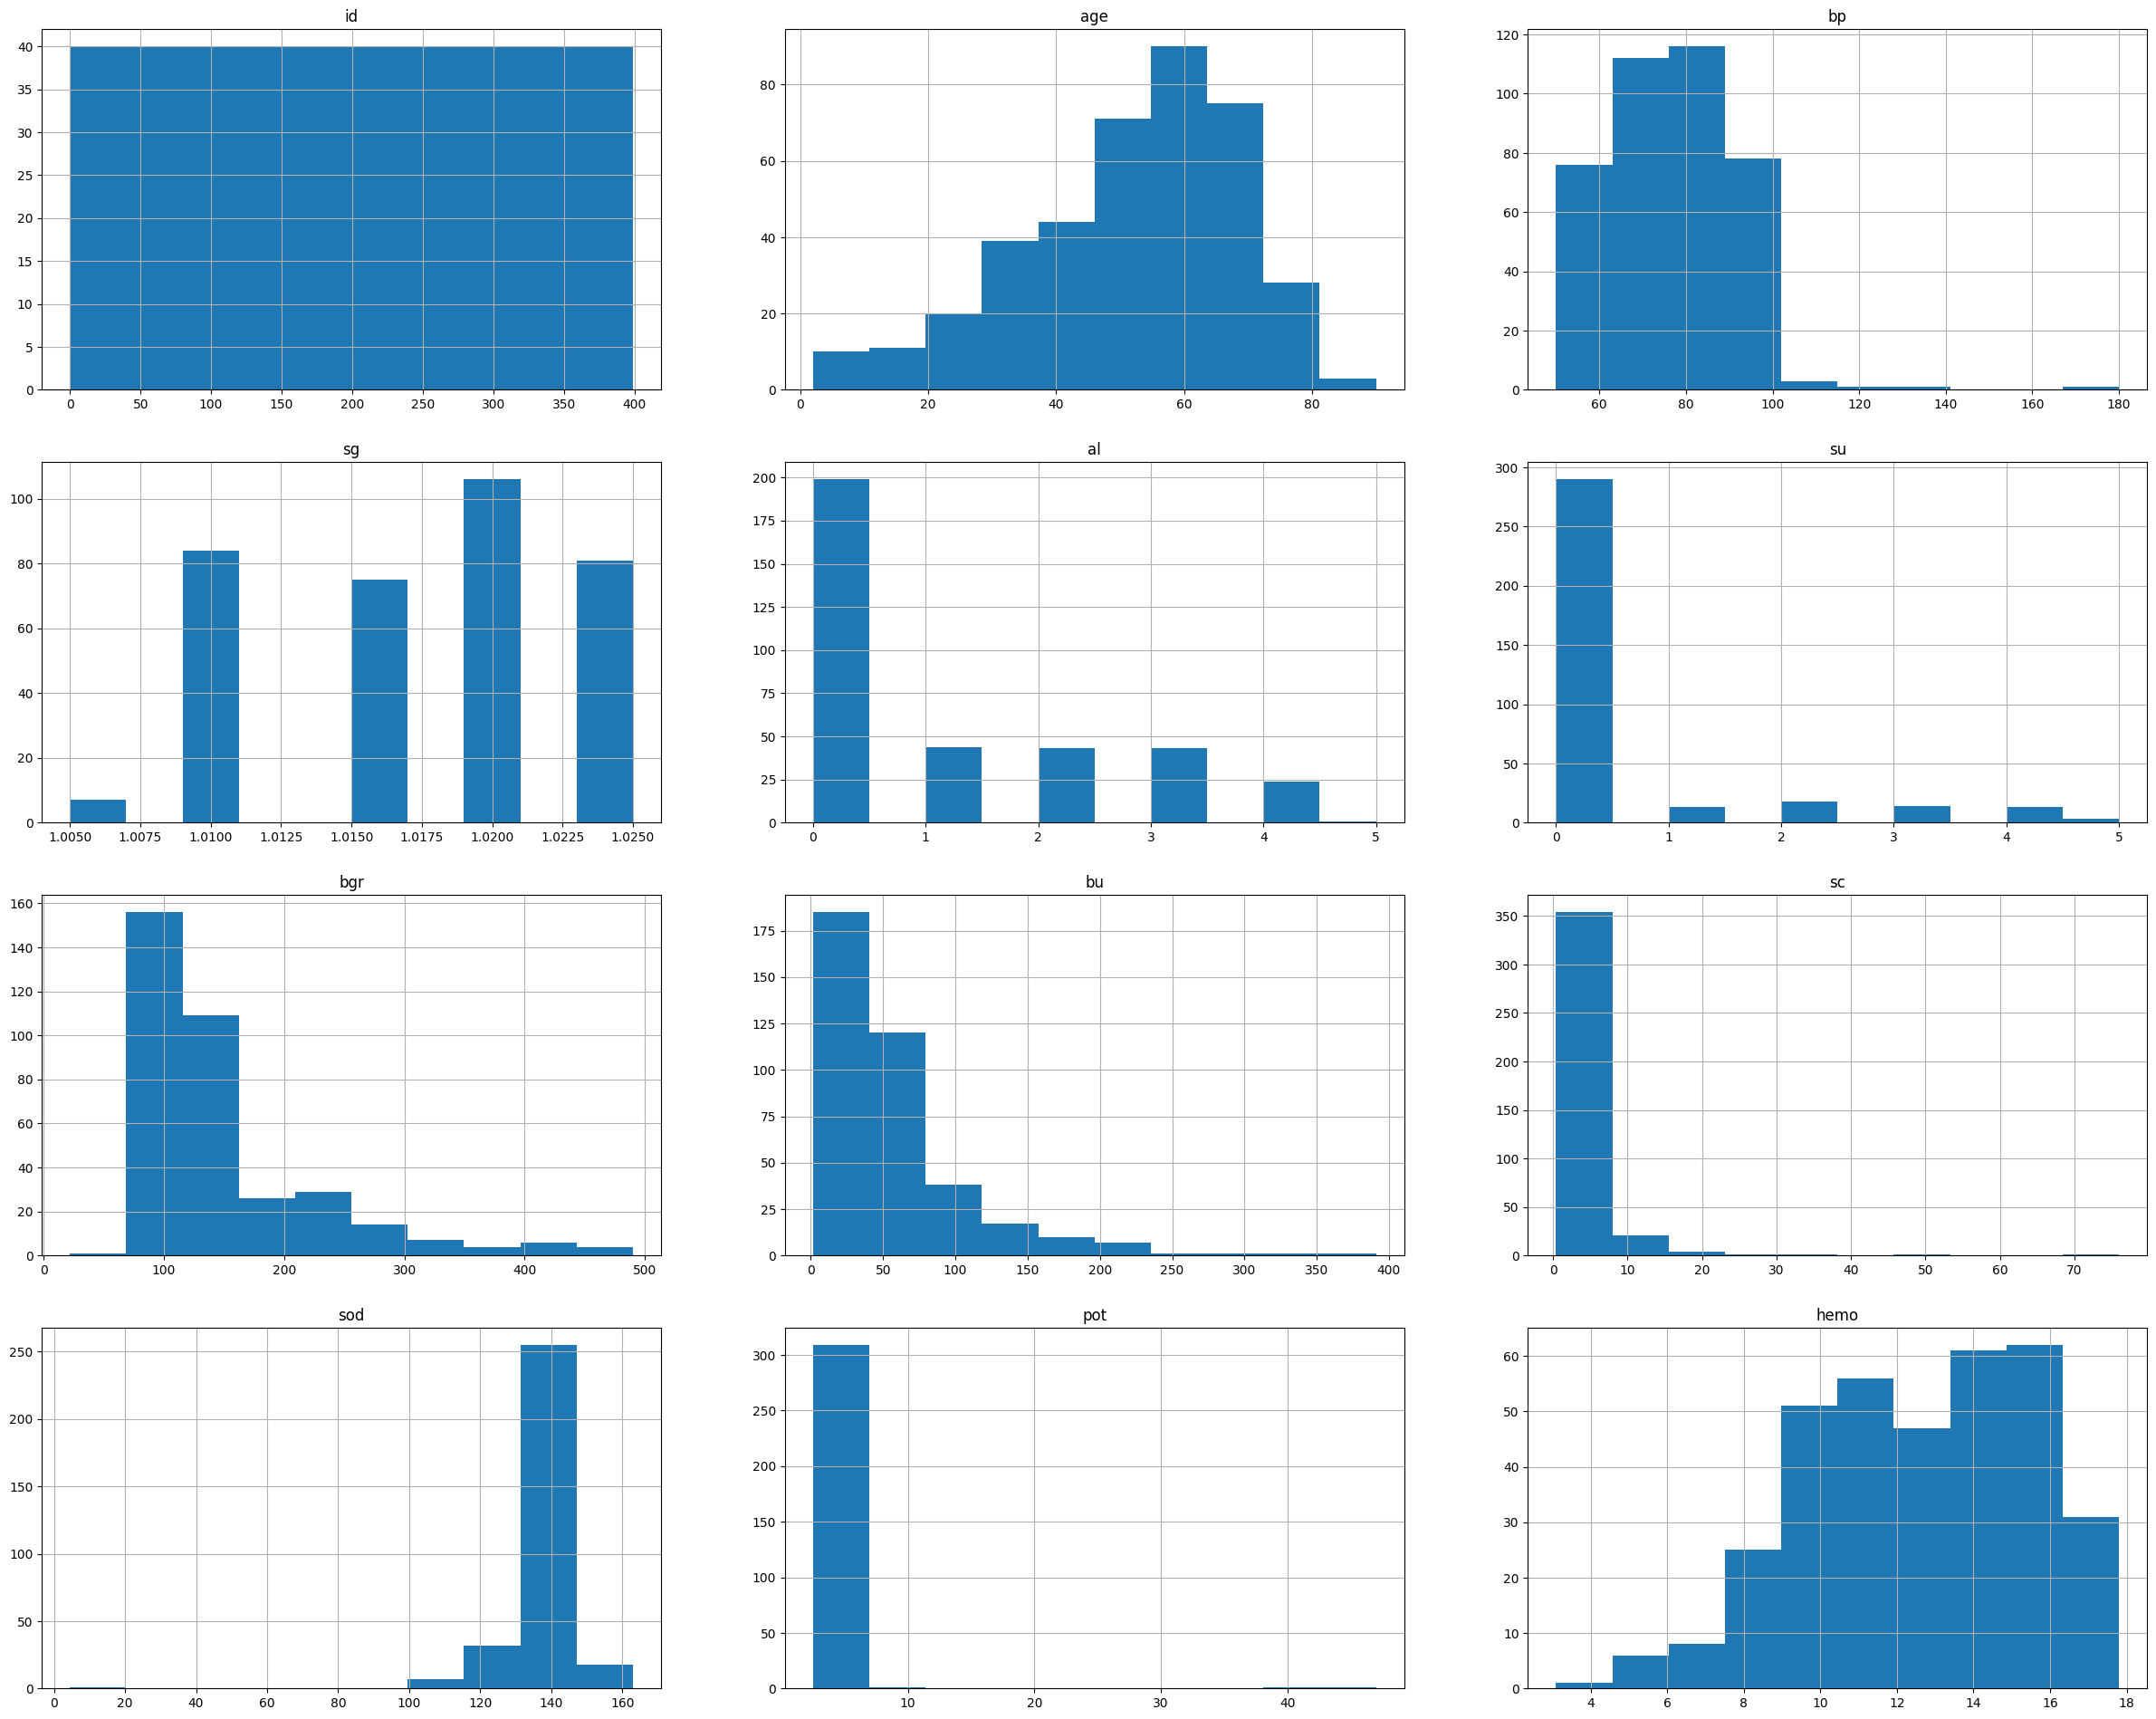

In [38]:
import pandas as pd
import matplotlib.pyplot as plt # Import the matplotlib library and assign it to the alias 'plt'

def extract_cat_num(kidney):
    cat_col=[col for col in kidney.columns if kidney[col].dtype=='O']
    num_col=[col for col in kidney.columns if kidney[col].dtype!='O']
    return cat_col,num_col

# Assuming your data is in a CSV file named 'kidney_disease.csv'
# Replace 'kidney_disease.csv' with the actual file path if it's different
kidney = pd.read_csv('kidney_disease.csv') # This line loads the data into the 'kidney' DataFrame

# Call the function and assign the results to variables in the global scope
cat_col, num_col = extract_cat_num(kidney) 

# Now you can use cat_col and num_col in the next cell

plt.figure(figsize=(30,30)) # Now 'plt' is recognized and the code should work
for i,feature in enumerate(num_col):
    plt.subplot(5,3,i+1)   # 5 rows and 3 columns
    kidney[feature].hist()
    plt.title(feature)

In [39]:
len(cat_col)

14

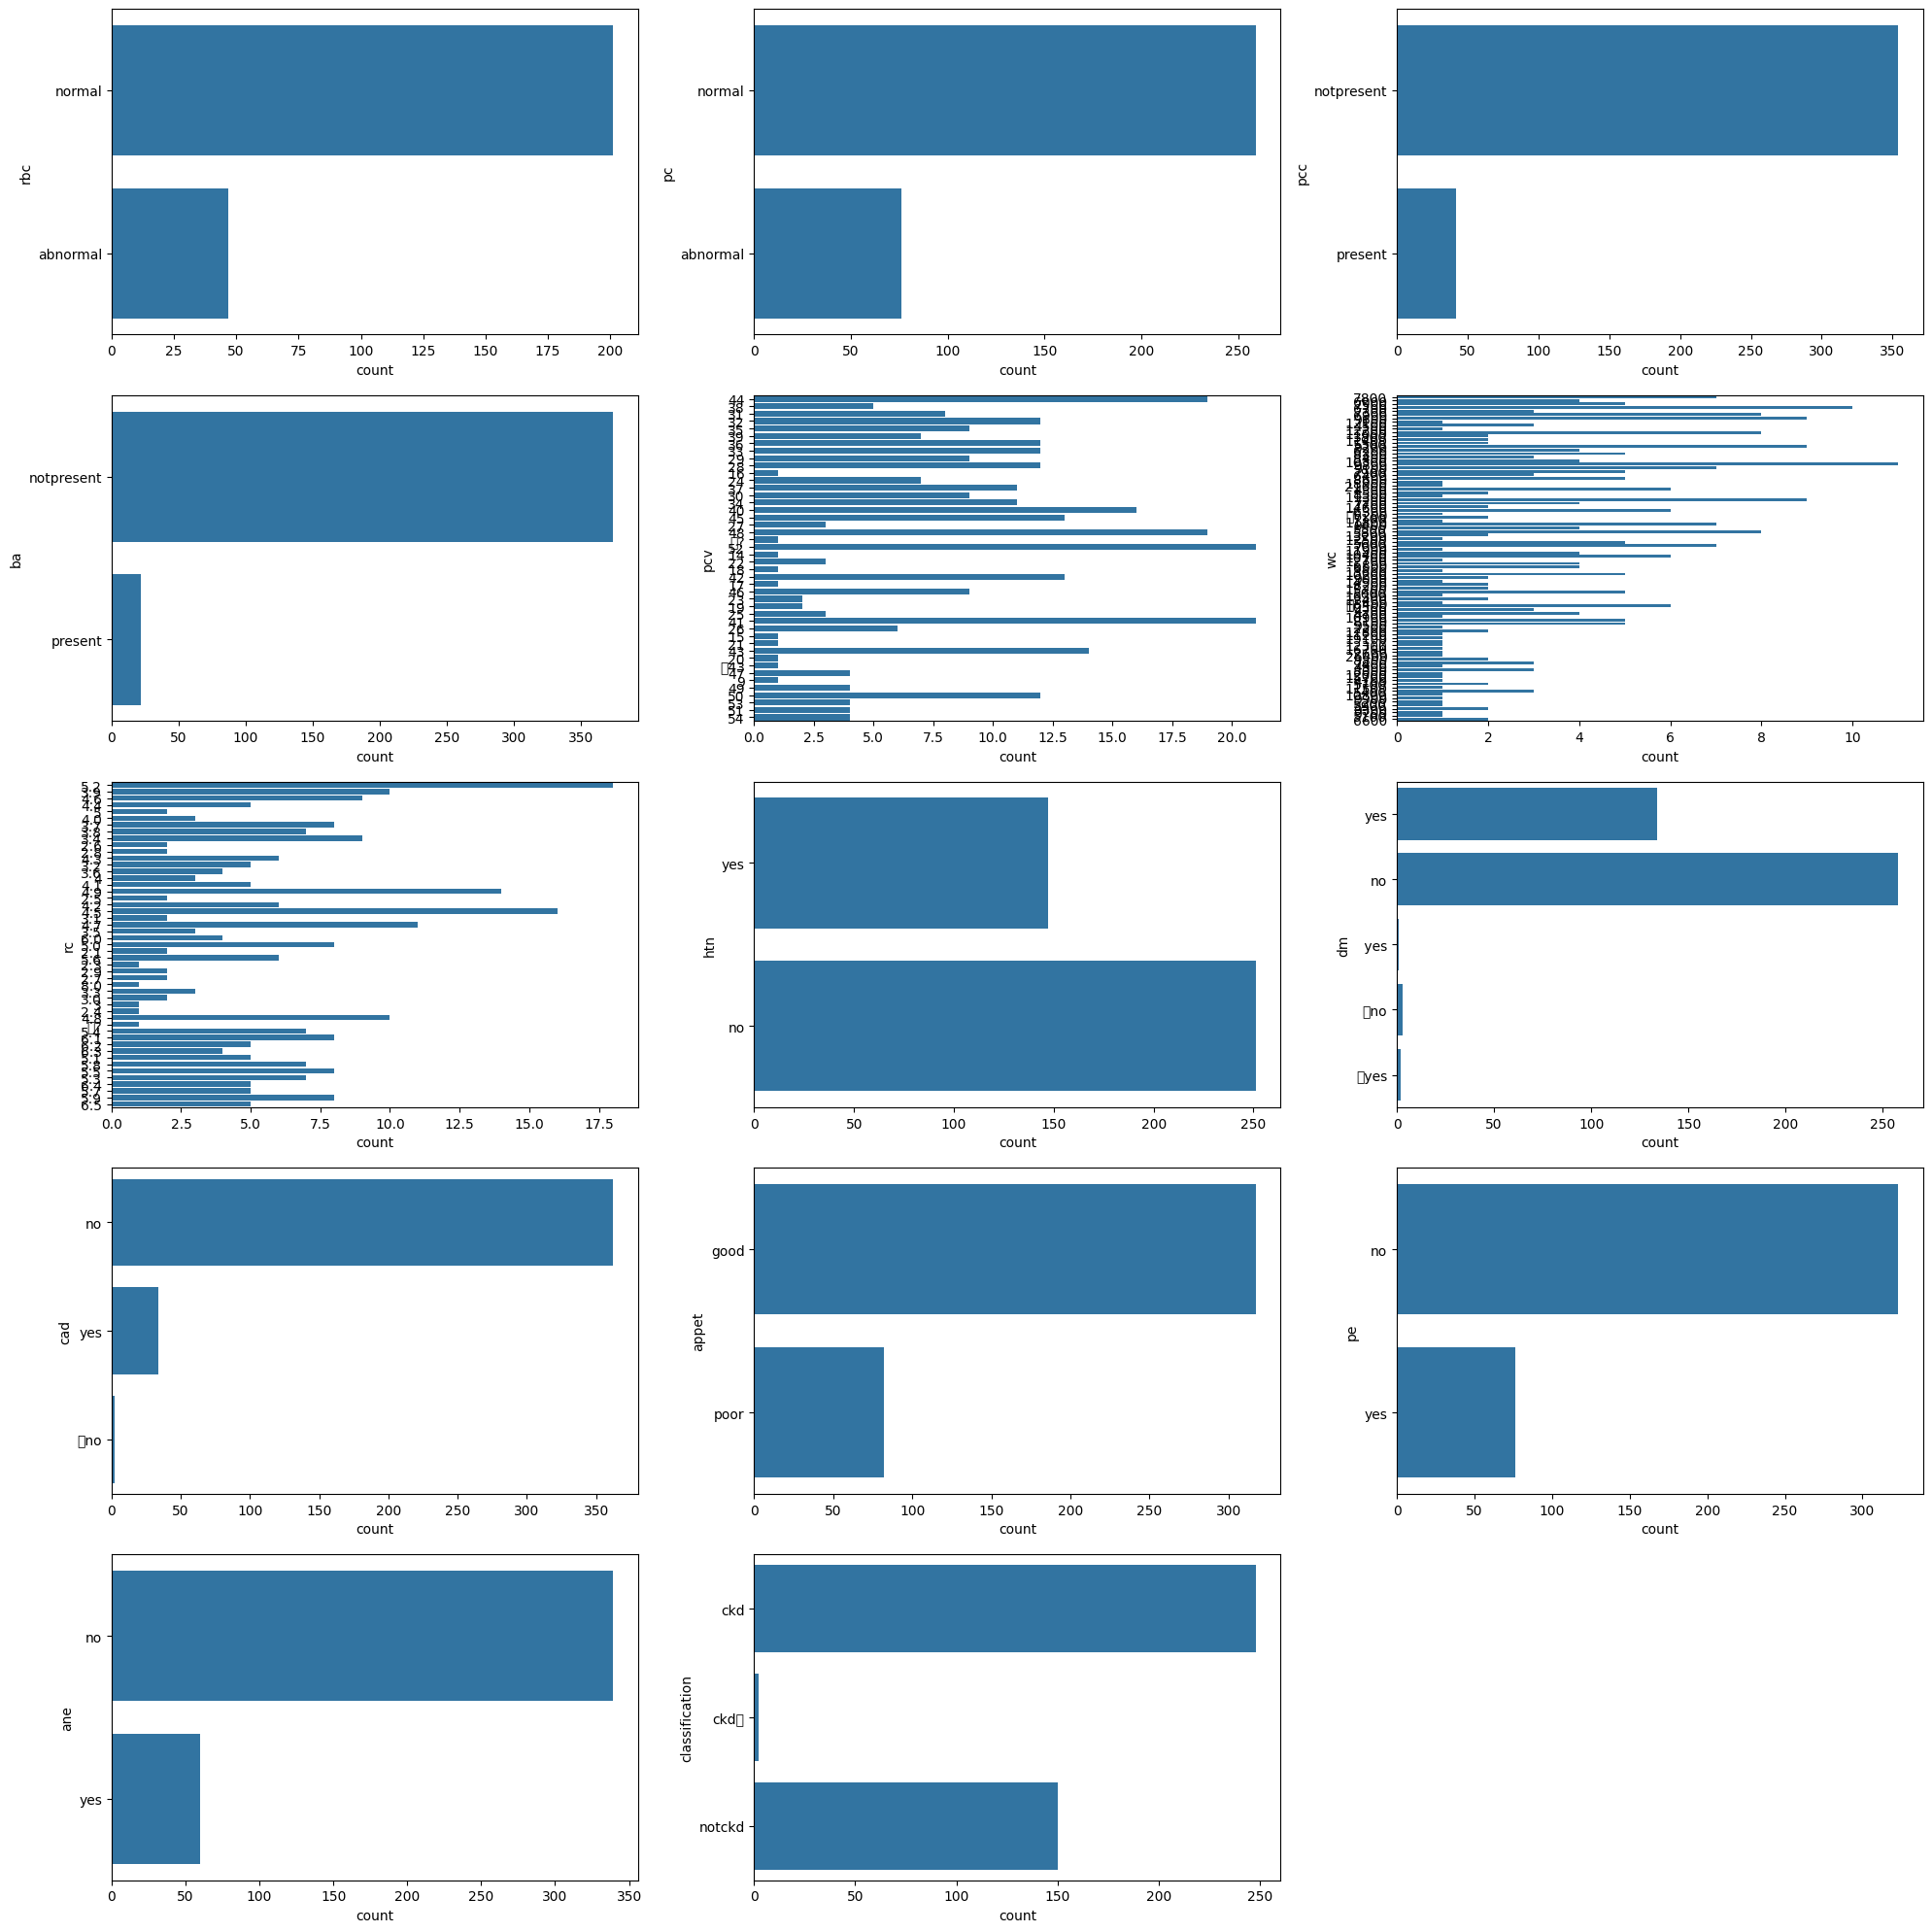

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,20))
# Adjust the subplot grid to accommodate all features
# Using 5 rows and 3 columns to fit 14 features
# you can change this 5 and 3 to get the desired rows and column numbers
for i,feature in enumerate(cat_col):
    plt.subplot(5,3,i+1)
    sns.countplot(kidney[feature])
plt.tight_layout() # Adjusts subplot params so that the subplot(s) fits in to the figure area.
plt.show()

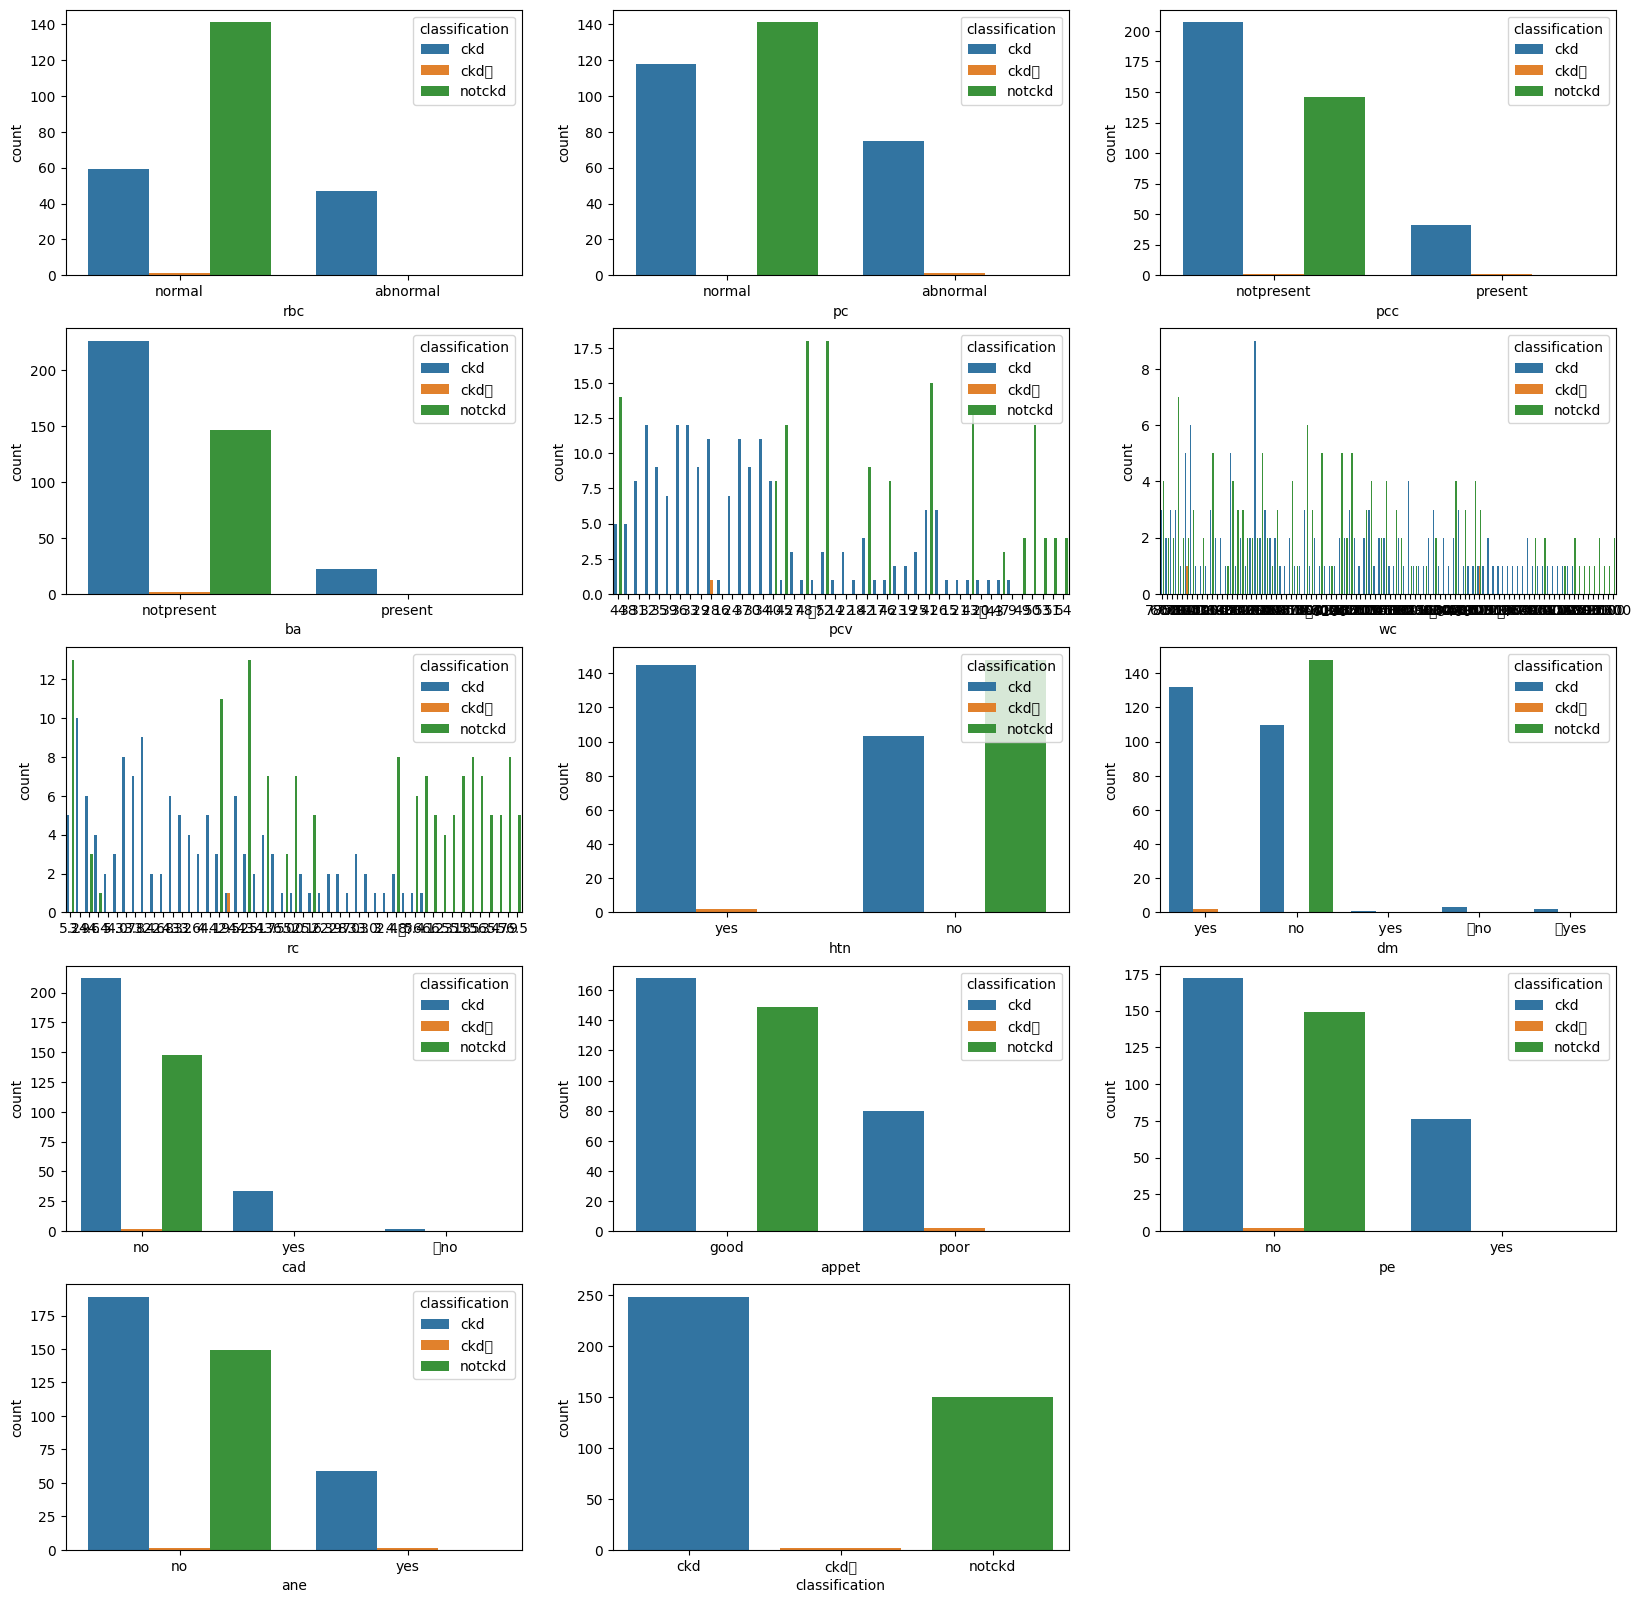

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,20))

# Increase either the number of rows or columns to accommodate all features.
# For example, using 5 rows and 3 columns will give you 15 subplots, enough for 14 features.
for i,feature in enumerate(cat_col):
    # Changed subplot grid to 5 rows, 3 columns
    plt.subplot(5,3,i+1)
    sns.countplot(x=kidney[feature], hue=kidney['classification'])

plt.show()

<Axes: xlabel='classification', ylabel='count'>

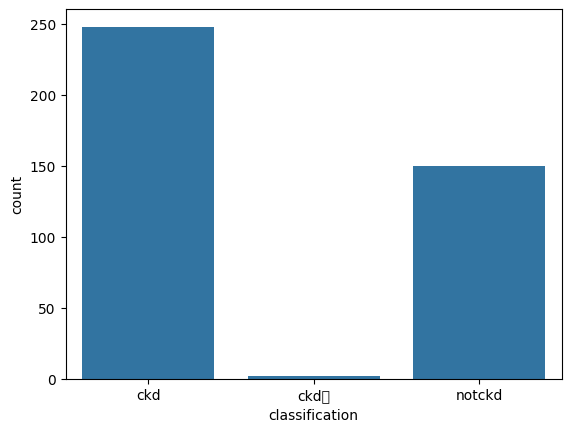

In [42]:
sns.countplot(x='classification', data=kidney)

In [43]:
import pandas as pd
import numpy as np

# Select only numerical columns for correlation calculation
numerical_cols = kidney.select_dtypes(include=np.number).columns
correlation_matrix = kidney[numerical_cols].corr()

# Display the correlation matrix
print(correlation_matrix)

            id       age        bp        sg        al        su       bgr  \
id    1.000000 -0.185308 -0.245744  0.642156 -0.541993 -0.283416 -0.338673   
age  -0.185308  1.000000  0.159480 -0.191096  0.122091  0.220866  0.244992   
bp   -0.245744  0.159480  1.000000 -0.218836  0.160689  0.222576  0.160193   
sg    0.642156 -0.191096 -0.218836  1.000000 -0.469760 -0.296234 -0.374710   
al   -0.541993  0.122091  0.160689 -0.469760  1.000000  0.269305  0.379464   
su   -0.283416  0.220866  0.222576 -0.296234  0.269305  1.000000  0.717827   
bgr  -0.338673  0.244992  0.160193 -0.374710  0.379464  0.717827  1.000000   
bu   -0.307175  0.196985  0.188517 -0.314295  0.453528  0.168583  0.143322   
sc   -0.268683  0.132531  0.146222 -0.361473  0.399198  0.223244  0.114875   
sod   0.364251 -0.100046 -0.116422  0.412190 -0.459896 -0.131776 -0.267848   
pot  -0.092347  0.058377  0.075151 -0.072787  0.129038  0.219450  0.066966   
hemo  0.640298 -0.192928 -0.306540  0.602582 -0.634632 -0.224775

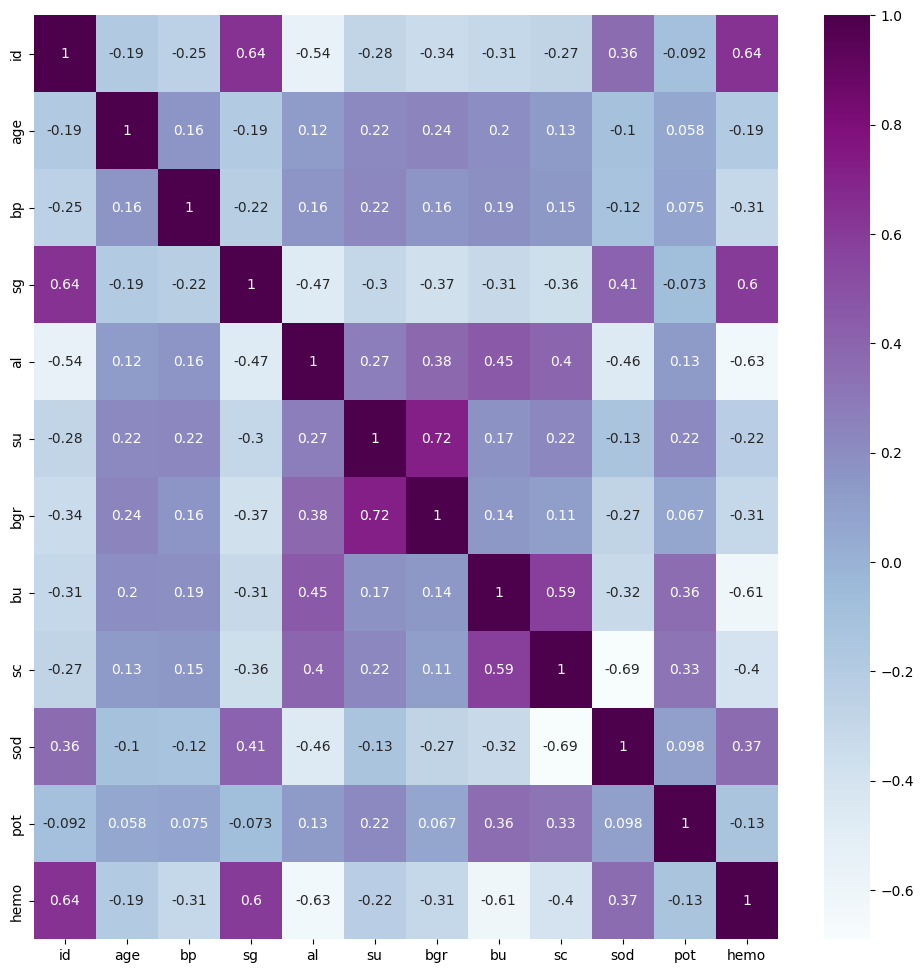

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))

# Select only numerical columns for correlation calculation
numerical_cols = kidney.select_dtypes(include=np.number).columns
correlation_matrix = kidney[numerical_cols].corr(method='pearson')

# Generate the heatmap using only the numerical features
sns.heatmap(correlation_matrix, cbar=True, cmap='BuPu', annot=True)

plt.show()

In [45]:
kidney['rc'] = pd.to_numeric(kidney['rc'], errors='coerce')
kidney.groupby(['rbc','classification'])['rc'].agg(['count','mean','median','min','max'])

count      mean  median  min  max
rbc      classification                                   
abnormal ckd                25  3.832000     3.7  2.5  5.6
normal   ckd                40  3.782500     3.8  2.1  8.0
         ckd\t               0       NaN     NaN  NaN  NaN
         notckd            134  5.368657     5.3  4.4  6.5

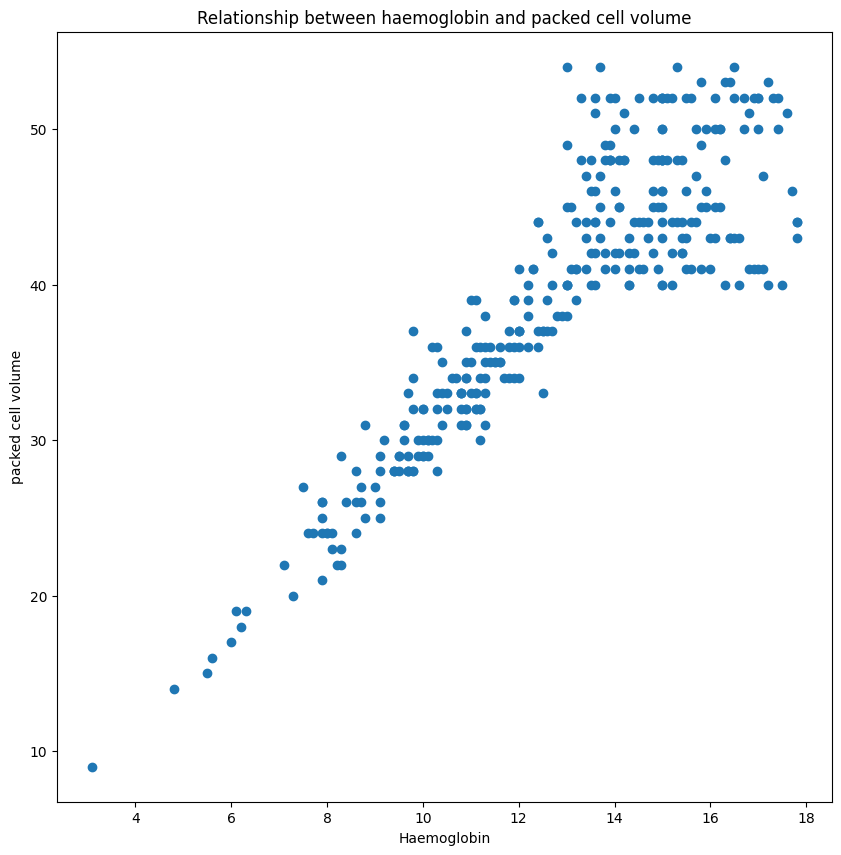

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'hemo' and 'pcv' columns to numeric, forcing non-numeric values to NaN
kidney['hemo'] = pd.to_numeric(kidney['hemo'], errors='coerce')
kidney['pcv'] = pd.to_numeric(kidney['pcv'], errors='coerce')

# Drop rows with NaN values in 'hemo' and 'pcv' to avoid plotting issues
kidney = kidney.dropna(subset=['hemo', 'pcv'])

plt.figure(figsize=(10, 10))
plt.scatter(x=kidney['hemo'], y=kidney['pcv'])
plt.xlabel('Haemoglobin')
plt.ylabel('packed cell volume')
plt.title('Relationship between haemoglobin and packed cell volume')
plt.show()

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd # Import pandas explicitly

def kde(column_name):
    """
    Generates a Kernel Density Estimate (KDE) plot for the specified column in the 'kidney' DataFrame.

    Args:
        column_name (str): The name of the column to plot.
    """
    # Check if the column exists in the DataFrame before accessing it
    if column_name in kidney.columns:
        sns.kdeplot(kidney[column_name])
        plt.title(f'KDE Plot of {column_name}')
        plt.show()
    else:
        print(f"Error: Column '{column_name}' not found in the DataFrame.")

# Assuming 'kidney' is your DataFrame
# Replace 'kidney' with your actual DataFrame variable if it's different
# For example:
# import pandas as pd
# kidney = pd.read_csv('your_kidney_data.csv')
# Print the available columns to confirm if 'albumin' exists
print(kidney.columns)

kde('albumin')

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')
Error: Column 'albumin' not found in the DataFrame.


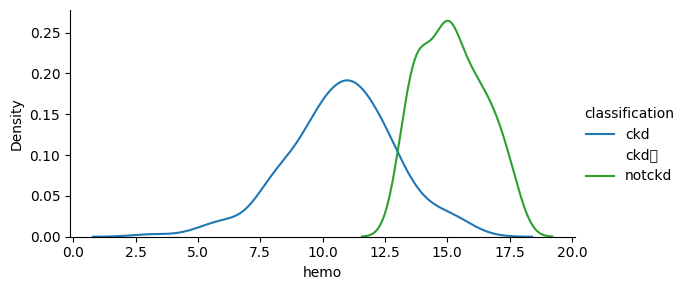

In [48]:
grid=sns.FacetGrid(kidney,hue='classification',aspect=2)
grid.map(sns.kdeplot,'hemo') # Changed 'haemoglobin' to 'hemo'
grid.add_legend()

In [49]:
kidney.isnull().sum()

id                  0
age                 6
bp                  9
sg                 28
al                 27
su                 28
rbc               104
pc                 42
pcc                 3
ba                  3
bgr                27
bu                 11
sc                  9
sod                58
pot                59
hemo                0
pcv                 0
wc                 41
rc                 63
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [50]:
kidney.isnull().sum().sort_values(ascending=False)

rbc               104
rc                 63
pot                59
sod                58
pc                 42
wc                 41
sg                 28
su                 28
al                 27
bgr                27
bu                 11
bp                  9
sc                  9
age                 6
pcc                 3
ba                  3
dm                  2
htn                 2
cad                 2
ane                 1
appet               1
pe                  1
id                  0
hemo                0
pcv                 0
classification      0
dtype: int64

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')


<Axes: xlabel='classification', ylabel='age'>

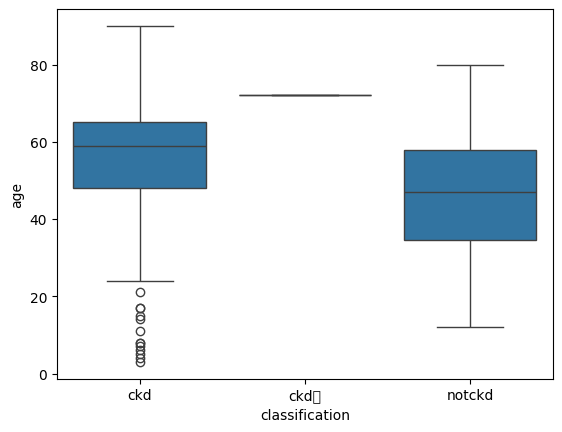

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns # Assuming this is what sns refers to
import pandas as pd

# ... (your previous code to load kidney DataFrame) ...

# Check the column names in the kidney DataFrame
print(kidney.columns)

# 1. If the column name is slightly different, correct it:
# Example: If the column name is 'classification', replace 'class' with 'classification'
sns.boxplot(x=kidney['classification'], y=kidney['age'])

# 2. If the column is not present, you might need to create it or load the correct data.

# 3. If the DataFrame is not loaded, load it before using it:
# kidney = pd.read_csv('path/to/your/kidney_data.csv')  # Replace with the actual file path

In [52]:
list(enumerate(cat_col))

[(0, 'rbc'),
 (1, 'pc'),
 (2, 'pcc'),
 (3, 'ba'),
 (4, 'pcv'),
 (5, 'wc'),
 (6, 'rc'),
 (7, 'htn'),
 (8, 'dm'),
 (9, 'cad'),
 (10, 'appet'),
 (11, 'pe'),
 (12, 'ane'),
 (13, 'classification')]

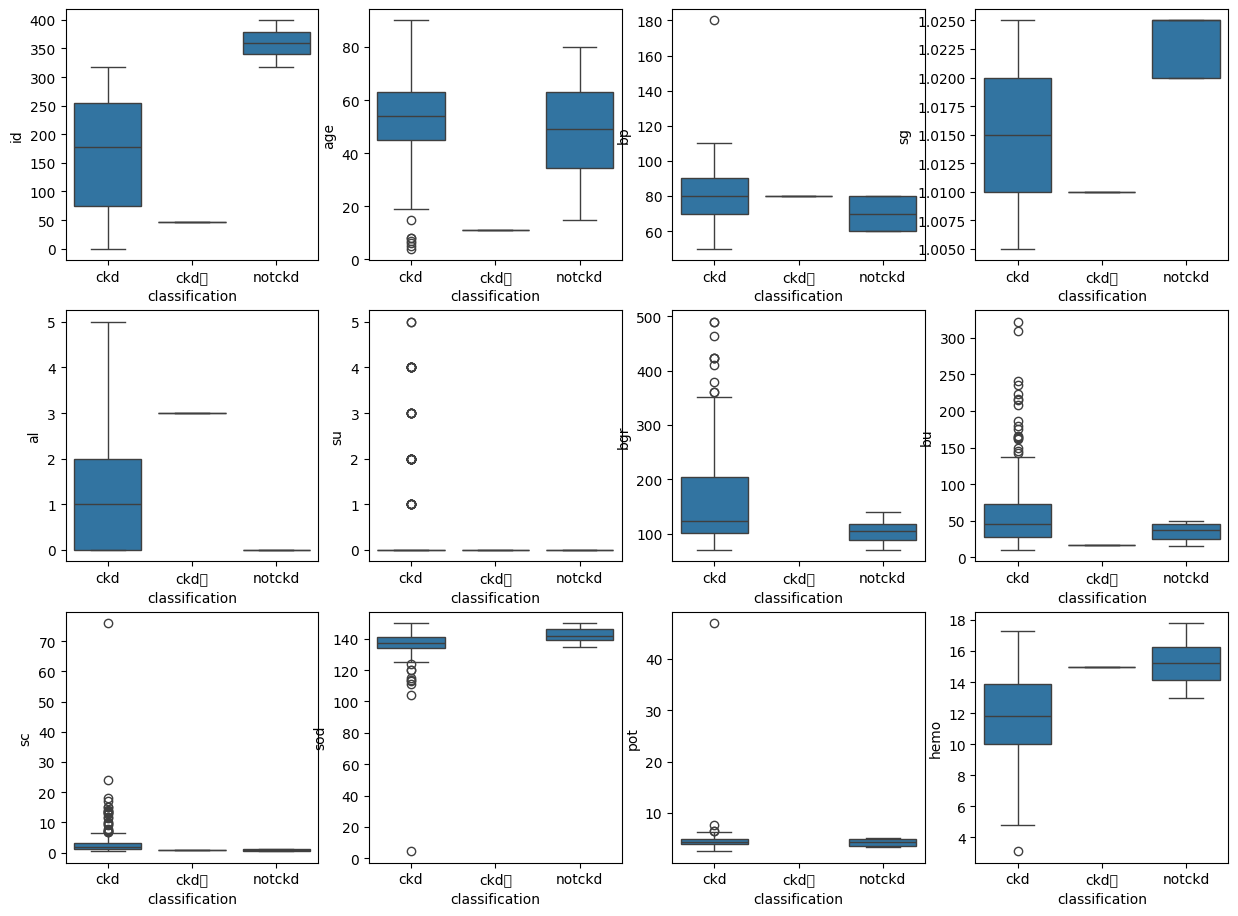

In [53]:
plt.figure(figsize=(15,15))
for i in enumerate(num_col):
    plt.subplot(4,4,i[0]+1)
    # Replacing 'class' with 'classification' (or the correct column name)
    sns.boxplot(x=kidney['classification'],y=i[1],data=kidney.reset_index())
    # If the column is named differently, replace 'classification' with the actual name
    # If you are unsure about the column name, print kidney.columns to see all column names

In [54]:
import numpy as np

# Select only numerical columns from the DataFrame
numerical_kidney = kidney.select_dtypes(include=np.number)

# Now calculate the mean of the numerical columns
np.mean(numerical_kidney)

np.float64(54.00814483893722)

In [55]:
kidney.isnull().sum()

id                  0
age                 6
bp                  9
sg                 28
al                 27
su                 28
rbc               104
pc                 42
pcc                 3
ba                  3
bgr                27
bu                 11
sc                  9
sod                58
pot                59
hemo                0
pcv                 0
wc                 41
rc                 63
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [56]:
for i in num_col:
    kidney[i].fillna(kidney[i].median(),inplace=True)
kidney.isnull().sum()

id                  0
age                 0
bp                  0
sg                  0
al                  0
su                  0
rbc               104
pc                 42
pcc                 3
ba                  3
bgr                 0
bu                  0
sc                  0
sod                 0
pot                 0
hemo                0
pcv                 0
wc                 41
rc                 63
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [57]:
kidney.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,rc
count,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,264.000000
mean,212.602446,51.434251,76.269113,1.017890,0.892966,0.397554,143.561162,55.686544,2.820031,137.906728,4.503976,12.695413,38.856269,4.706061
std,117.652164,16.738547,13.503955,0.005633,1.330683,1.045466,76.550031,47.597756,5.298316,9.808974,2.451621,2.872443,9.009580,1.015788
min,0.000000,3.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2.100000
25%,110.500000,42.000000,70.000000,1.015000,0.000000,0.000000,100.000000,27.000000,0.900000,135.500000,3.900000,10.650000,32.000000,3.975000
50%,225.000000,54.000000,80.000000,1.020000,0.000000,0.000000,119.500000,41.000000,1.200000,139.000000,4.400000,13.000000,40.000000,4.800000
75%,312.500000,64.000000,80.000000,1.020000,2.000000,0.000000,140.500000,59.000000,2.700000,141.000000,4.800000,15.000000,45.000000,5.400000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,322.000000,76.000000,150.000000,47.000000,17.800000,54.000000,8.000000


In [58]:
# Check if the column exists in the DataFrame
if 'red blood cells' in kidney.columns:
    # If it exists, calculate the null values
    null_count = kidney['red blood cells'].isnull().sum()
    print(f"Number of null values in 'red blood cells': {null_count}")
else:
    # If it doesn't exist, print an error message
    print("Column 'red blood cells' not found in the DataFrame.")
    # Print available columns for reference
    print("Available columns:", kidney.columns)

Column 'red blood cells' not found in the DataFrame.
Available columns: Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')


In [59]:
# Check if the column exists in the DataFrame, accounting for potential case sensitivity
if any(col.lower() == 'red blood cells' for col in kidney.columns):
    # If it exists (case-insensitive match), extract the actual column name
    actual_col_name = next(col for col in kidney.columns if col.lower() == 'red blood cells')

    # Calculate null values and print
    null_count = kidney[actual_col_name].isnull().sum()
    print(f"Number of null values in '{actual_col_name}': {null_count}")

    # Sample data from the column
    random_sample = kidney[actual_col_name].dropna().sample(152)
    print(random_sample)

else:
    # If it doesn't exist, print an error message
    print("Column 'red blood cells' (or similar) not found in the DataFrame.")
    # Print available columns for reference
    print("Available columns:", kidney.columns)

Column 'red blood cells' (or similar) not found in the DataFrame.
Available columns: Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')


In [60]:
# Check if the column exists in the DataFrame, accounting for potential case sensitivity
if any(col.lower() == 'red blood cells' for col in kidney.columns):
    # If it exists (case-insensitive match), extract the actual column name
    actual_col_name = next(col for col in kidney.columns if col.lower() == 'red blood cells')

    # Calculate null values and print
    null_count = kidney[actual_col_name].isnull().sum()
    print(f"Number of null values in '{actual_col_name}': {null_count}")

    # Sample data from the column
    random_sample = kidney[actual_col_name].dropna().sample(152) # This line defines random_sample
    print(random_sample)

    # Now use random_sample to fill NaN values:
    kidney.loc[kidney['red blood cells'].isnull(),'red blood cells']=random_sample

else:
    # If it doesn't exist, print an error message
    print("Column 'red blood cells' (or similar) not found in the DataFrame.")
    # Print available columns for reference
    print("Available columns:", kidney.columns)

kidney.head() # Display the updated DataFrame

Column 'red blood cells' (or similar) not found in the DataFrame.
Available columns: Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44.0,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38.0,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300,4.6,no,no,no,good,no,no,ckd


In [61]:
for col in cat_col:
    print('{} has {} categories'.format(col,kidney[col].nunique()))

rbc has 2 categories
pc has 2 categories
pcc has 2 categories
ba has 2 categories
pcv has 42 categories
wc has 92 categories
rc has 45 categories
htn has 2 categories
dm has 3 categories
cad has 3 categories
appet has 2 categories
pe has 2 categories
ane has 2 categories
classification has 3 categories


In [62]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in cat_col:
    kidney[col]=le.fit_transform(kidney[col])
kidney.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,2,1,0,0,...,31,72,30,1,2,1,0,0,0,0
1,1,7.0,50.0,1.020,4.0,0.0,2,1,0,0,...,25,56,45,0,1,1,0,0,0,0
2,2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,...,18,70,45,0,2,1,1,0,1,0
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,19,62,17,1,1,1,1,1,1,0
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,...,22,68,24,0,1,1,0,0,0,0


In [63]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Assuming 'classification' is the correct column name for the dependent variable
dep_col = 'classification'  # Changed from 'class' to 'classification'

ind_col = [col for col in kidney.columns if col != dep_col]
X = kidney[ind_col]
y = kidney[dep_col]
X.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,0,48.0,80.0,1.020,1.0,0.0,2,1,0,0,...,15.4,31,72,30,1,2,1,0,0,0
1,1,7.0,50.0,1.020,4.0,0.0,2,1,0,0,...,11.3,25,56,45,0,1,1,0,0,0
2,2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,...,9.6,18,70,45,0,2,1,1,0,1
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,11.2,19,62,17,1,1,1,1,1,1
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,...,11.6,22,68,24,0,1,1,0,0,0


In [64]:
imp_features=SelectKBest(score_func=chi2,k=20)
from sklearn.feature_selection import SelectKBest, chi2
imp_features=SelectKBest(score_func=chi2,k=20)
imp_features=imp_features.fit(X,y)
imp_features
#SelectKBest(k=20, score_func=<function chi2 at 0x000002777BDCE670>)
imp_features.scores_

array([1.52054355e+04, 1.02550942e+02, 8.26541346e+01, 5.24377758e-03,
       2.32637363e+02, 1.03571429e+02, 4.55317821e+00, 5.87114173e+00,
       1.61031817e+01, 3.66174451e+00, 2.28651064e+03, 2.31436007e+03,
       3.44032586e+02, 2.62544089e+01, 1.49324574e+00, 1.26029617e+02,
       5.61440234e+02, 1.66988206e+00, 1.02538746e+02, 8.25770882e+01,
       1.81547619e+01, 1.27322446e+00, 4.28928724e+01, 3.93024978e+01,
       3.74224606e+01])

In [65]:
datascore=pd.DataFrame(imp_features.scores_,columns=['Score'])
datascore

,Score
0,15205.435487
1,102.550942
2,82.654135
3,0.005244
4,232.637363
5,103.571429
6,4.553178
7,5.871142
8,16.103182
9,3.661745


In [66]:
X.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane'],
      dtype='object')

In [67]:
dfcols=pd.DataFrame(X.columns)
dfcols

,0
0,id
1,age
2,bp
3,sg
4,al
5,su
6,rbc
7,pc
8,pcc
9,ba


In [68]:
features_rank=pd.concat([dfcols,datascore],axis=1)
features_rank

,0,Score
0,id,15205.435487
1,age,102.550942
2,bp,82.654135
3,sg,0.005244
4,al,232.637363
5,su,103.571429
6,rbc,4.553178
7,pc,5.871142
8,pcc,16.103182
9,ba,3.661745


In [69]:
features_rank.columns=['features','score']
features_rank

,features,score
0,id,15205.435487
1,age,102.550942
2,bp,82.654135
3,sg,0.005244
4,al,232.637363
5,su,103.571429
6,rbc,4.553178
7,pc,5.871142
8,pcc,16.103182
9,ba,3.661745


In [70]:
features_rank.nlargest(10,'score')

,features,score
0,id,15205.435487
11,bu,2314.360074
10,bgr,2286.510642
16,pcv,561.440234
12,sc,344.032586
4,al,232.637363
15,hemo,126.029617
5,su,103.571429
1,age,102.550942
18,rc,102.538746


In [71]:
selected=features_rank.nlargest(10,'score')['features'].values
selected

array(['id', 'bu', 'bgr', 'pcv', 'sc', 'al', 'hemo', 'su', 'age', 'rc'],
      dtype=object)

In [72]:
X_new=kidney[selected]
X_new.head()

,id,bu,bgr,pcv,sc,al,hemo,su,age,rc
0,0,36.0,121.0,31,1.2,1.0,15.4,0.0,48.0,30
1,1,18.0,119.5,25,0.8,4.0,11.3,0.0,7.0,45
2,2,53.0,423.0,18,1.8,2.0,9.6,3.0,62.0,45
3,3,56.0,117.0,19,3.8,4.0,11.2,0.0,48.0,17
4,4,26.0,106.0,22,1.4,2.0,11.6,0.0,51.0,24


In [73]:
len(X_new)
X_new.shape

(327, 10)

In [74]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_new,y,random_state=0,test_size=0.3)
X_train.shape

(228, 10)

In [75]:
y_train.value_counts()

classification
0    121
2    106
1      1
Name: count, dtype: int64

In [76]:
from xgboost import XGBClassifier

params = {'eta': [0, 0.5, 0.20, 0.25],
          'max_depth': [5, 8, 10],
          'min_child_weight': [1, 3, 5, 7],
          'gamma': [0.0, 0.1, 0.2, 0.4],
          'colsample_bytree': [0.3, 0.4, 0.7]}

xgb = XGBClassifier()

In [77]:
from sklearn.model_selection import RandomizedSearchCV
classifier=XGBClassifier()
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.7],
                                        'eta': [0, 0.5, 0.2, 0.25],
                                        'gamma': [0.0, 0.1, 0.2, 0.4],
                                        'max_depth': [5, 8, 10],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [78]:
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.25, eval_metric=None,
              feature_types=None, gamma=0.0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=3, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [79]:
random_search.best_params_

{'min_child_weight': 3,
 'max_depth': 10,
 'gamma': 0.0,
 'eta': 0.25,
 'colsample_bytree': 0.7}

In [80]:
classifier=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='', learning_rate=0.300000012, max_delta_step=0,
              max_depth=5, min_child_weight=1,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)
classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.2, gpu_id=-1,
              grow_policy=None, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=0, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              multi_strategy=None, n_estimators=100, n_jobs=8,
              num_parallel_tree=1, ...)

In [81]:
y_pred=classifier.predict(X_test)
y_pred

array([0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2,
       0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2])

In [82]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test,y_pred)

array([[55,  6],
       [ 0, 38]])

In [83]:
accuracy_score(y_test,y_pred)


0.9393939393939394